In [1]:
import sys
sys.path.append('../')

from src.nn.linear import Linear
from src.nn.functional import ReLU, Softmax, MSELoss
from src.optim.optim import SGD
from src.utils.template import BaseClass
from src.utils.dataset import MnistDataset

import torch
from torch import nn

import numpy as np

import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def convert_to_indeces(gt, classes):
    ground_truths = []
    for idxs in gt:
        indeces = np.zeros(classes, dtype=np.float32).tolist()
        indeces[idxs] = 1.
        ground_truths.append(indeces)

    return np.array(ground_truths)

In [3]:
class MLP(BaseClass):
    def __init__(self, input_size, output_size, hidden_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        
        self.layers = [
            Linear(input_size, hidden_size),
            ReLU(), 
            Linear(hidden_size, output_size),
            Softmax()
        ]

    def forward(self, x: np.ndarray) -> np.ndarray:
        assert len(self.layers) > 0
        for layer in self.layers:
            x = layer(x)
        return x

In [4]:
model = MLP(input_size=2, output_size=5, hidden_size=5)

In [5]:
#inputs = np.array([[0.5, 0.7, 0.3, 0.1, 0.8],
#                   [0.1, 0.6, 0.9, 0.01, 0.4]])
inputs = np.array([[0.5, 0.7],
                   [0.1, 0.6]])
gt = np.array([2, 4])

In [6]:
gt = convert_to_indeces(gt, 5)
gt

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
preds = model.forward(inputs)
preds

array([[0.38649769, 0.17657223, 0.19931778, 0.11987193, 0.11774037],
       [0.35918262, 0.19701708, 0.20533271, 0.13081481, 0.10765278]])

In [8]:
my_loss = MSELoss()
loss = my_loss(preds, gt)
print(loss)

0.18732677838864364


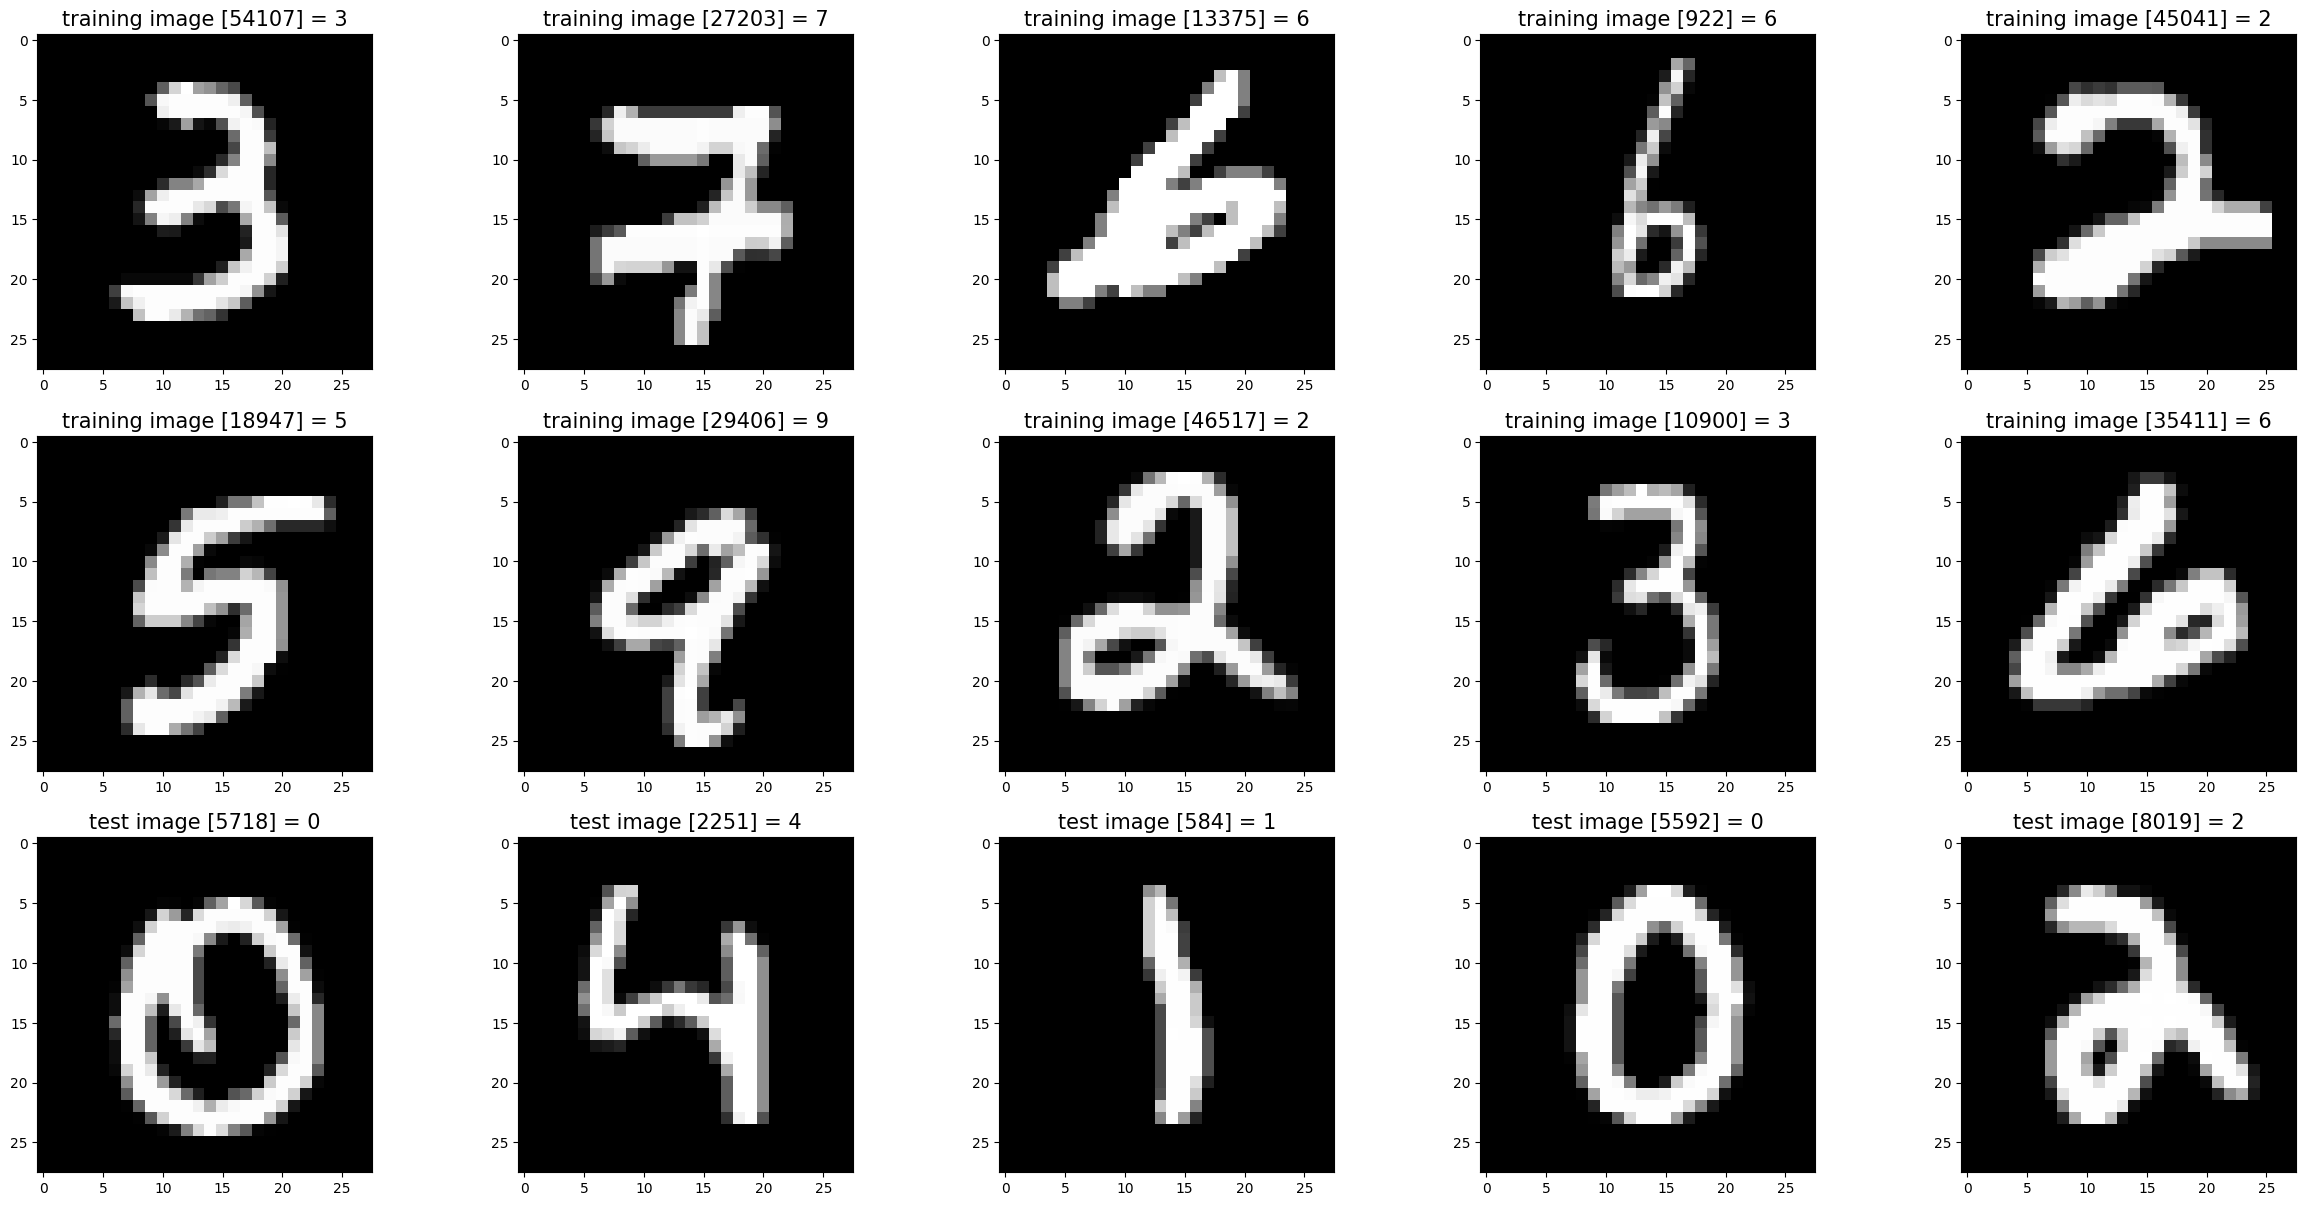

In [9]:
training_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-images.idx3-ubyte" #join(local_path, input_folder, 'train-images-idx3-ubyte')
training_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-labels.idx1-ubyte" #join(local_path, input_folder, 'train-labels-idx1-ubyte')
test_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-images.idx3-ubyte" #join(local_path, input_folder, 't10k-images-idx3-ubyte')
test_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-labels.idx1-ubyte" #join(local_path, input_folder, 't10k-labels-idx1-ubyte')


def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


mnist_train = MnistDataset(training_images_filepath, training_labels_filepath)
mnist_test = MnistDataset(test_images_filepath, test_labels_filepath)

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    x, y = mnist_train[r]
    images_2_show.append(x)
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    x, y = mnist_test[r]
    images_2_show.append(x)        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y))    

show_images(images_2_show, titles_2_show)